In [38]:
import pandas as pd
import numpy as np
import my_pickle as mp
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [6]:
df = mp.unjson_it('data_master')
print("Make sure we're not using ECT data")
print(df.timestamp.max())

Make sure we're not using ECT data
2017-10-02 01:35:58.644000


In [11]:
df.head()

,I_count_receiver,I_count_sender,I_ratio_receiver,I_ratio_sender,about_receiver,about_sender,activeAt_receiver,activeAt_sender,age_dif,age_receiver,...,type_receiver,type_sender,uid_receiver,uid_sender,updated_receiver,updated_sender,urgency_receiver,urgency_sender,work_receiver,work_sender
02sjTzcsaO02omVxM8Xm,0,0.0,NaN,0.000000,,The perfect place... wya ?,1.504701e+12,1.506146e+12,3.0,25,...,1.0,NaN,02sjTzcsaO,02omVxM8Xm,1515775880247,1.515780e+12,1.723056e+09,NaN,Babysitter,Delhi Palace
07Aj9wLBPC013LzOrVju,0,2.0,NaN,0.006803,,Integrative Medicine practitioner. Pain Manage...,1.493837e+12,1.507531e+12,6.0,24,...,1.0,NaN,07Aj9wLBPC,013LzOrVju,1515756691636,1.515786e+12,NaN,262402802.0,None,Entrepreneur
07lVtClAEQ01iDVeaXl1,6,0.0,0.014493,NaN,"My name is Briana, I'm an SMC student in my ea...",,1.502997e+12,1.504741e+12,5.0,20,...,NaN,1.0,07lVtClAEQ,01iDVeaXl1,1515770231009,1.515778e+12,-4.618784e+08,319640581.0,None,Icell
0AFU6guKDt01iDVeaXl1,1,0.0,0.004902,NaN,Looking for a few more people to rent a house ...,,1.506692e+12,1.504741e+12,3.0,22,...,1.0,1.0,0AFU6guKDt,01iDVeaXl1,1515752100409,1.515778e+12,NaN,319600182.0,Lyft,Icell
0AFU6guKDt01mfWG4vUm,0,1.0,NaN,0.004902,,Looking for a few more people to rent a house ...,1.491538e+12,1.506692e+12,4.0,26,...,1.0,1.0,01mfWG4vUm,0AFU6guKDt,1515798534367,1.515752e+12,NaN,NaN,None,Lyft


In [42]:
def drop_columns(df):
    col_to_drop = ['uid_sender','uid_receiver','mid_sender','mid_receiver',
                   'updated_sender','activeAt_sender',
                   'created_sender','available_sender','about_sender','birthday_sender', 'location_sender', 'work_sender',
                   'hometownCity_sender','hometownState_sender','hometownCountry_sender','college_sender','neighborhoods_sender',
                   'amenities_sender', 'hobbies_sender',
                   'updated_receiver','activeAt_receiver',
                   'created_receiver','available_receiver','about_receiver','birthday_receiver', 'location_receiver', 'work_receiver',
                   'hometownCity_receiver','hometownState_receiver','hometownCountry_receiver','college_receiver','neighborhoods_receiver',
                   'amenities_receiver', 'hobbies_receiver','timestamp']
                   
    return df.drop(col_to_drop, axis=1) 

X_df = drop_columns(df).fillna(df.mean(axis=0))
X_df.head()

,I_count_receiver,I_count_sender,I_ratio_receiver,I_ratio_sender,age_dif,age_receiver,age_sender,amenities_overlap,convo_length,distance,...,sentence_ratio_receiver,sentence_ratio_sender,smokingOk_receiver,smokingOk_sender,term_receiver,term_sender,type_receiver,type_sender,urgency_receiver,urgency_sender
02sjTzcsaO02omVxM8Xm,0,0.0,0.011298,0.000000,3.0,25,22.0,0,1,37.806874,...,0.016371,0.148148,1,1.0,6.0,11.450264,1.000000,0.862843,1.723056e+09,-6.768931e+09
07Aj9wLBPC013LzOrVju,0,2.0,0.011298,0.006803,6.0,24,30.0,1,1,5.482670,...,0.016371,0.030612,0,1.0,2.0,4.000000,1.000000,0.862843,2.679062e+09,2.624028e+08
07lVtClAEQ01iDVeaXl1,6,0.0,0.014493,0.012595,5.0,20,25.0,3,1,1.207884,...,0.014493,0.018102,1,1.0,13.0,12.000000,0.909091,1.000000,-4.618784e+08,3.196406e+08
0AFU6guKDt01iDVeaXl1,1,0.0,0.004902,0.012595,3.0,22,25.0,2,1,41.182387,...,0.014706,0.018102,0,1.0,12.0,12.000000,1.000000,1.000000,2.679062e+09,3.196002e+08
0AFU6guKDt01mfWG4vUm,0,1.0,0.011298,0.004902,4.0,26,22.0,1,1,46.212738,...,0.016371,0.014706,0,0.0,12.0,12.000000,1.000000,1.000000,2.679062e+09,-6.768931e+09


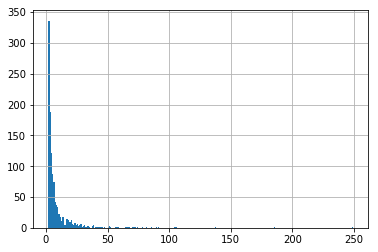

In [49]:
X_df.convo_length.hist(bins=range(2,250))
plt.show()

In [45]:
y = X_df.convo_length
X = X_df.drop(['convo_length'], axis=1)

In [46]:
X_array = np.asarray(X)
y_array = np.asarray(y)

In [47]:
X_array = sm.add_constant(X_array)

In [48]:
model = sm.OLS(np.asarray(y), np.asarray(X)).fit()

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s